#Gametime Scraper
This code allows the user to input a link for GameTime events and outputs two seperate graphs that highlights the median price for each section and minimum price for each section.

##Import Necessary Packages
requests and bs4 are used to access and scrape the ticket data from the website.

pandas is utilized to organize the data.

statistics and umpy are used to make calculations on the data.

seaborn is used to display the data.

In [61]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import statistics
import seaborn as sns
import numpy

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Creating the function
Below is the creation of the function that takes the input of a GameTime event URL and parses through the html to extract data relating to: price, section and seat.

This data is then compiled into a dataset which is used calculations and visualizations.



In [124]:
def scrape_gametime(url):
  response = requests.get(url) #sends a GET request to the specified url.

  soup = BeautifulSoup(response.text, 'html.parser') #print the contents of a specific part of a page

  price = soup.find_all('div', class_="pages-Event-components-ListingCard-ListingCard-module__price-info")
  pricelist = list()
  for element in price:
    pricelist.append(element.get_text()) #Finds all data relating to the pricing of tickets for an event

  section = soup.find_all('div', class_="pages-Event-components-ListingCard-ListingCard-module__section-name")
  sectionlist = list()
  for element in section:
    sectionlist.append(element.get_text()) #Finds all data relating to the section of tickets for an event

  seat = soup.find_all('div', class_="pages-Event-components-ListingCard-ListingCard-module__seat-details")
  seatlist = list()
  for element in seat:
    seatlist.append(element.get_text()) #Finds all data relating to the seat of tickets for an event


  pricelist = list(map(lambda sub:int(''.join(
      [ele for ele in sub if ele.isnumeric()])), pricelist)) #Parses out non-numeric data in the price data

  df = pd.DataFrame(list(zip(sectionlist,seatlist,pricelist)),
               columns =['Section', 'Seat', 'Price (before fees)']) #constructs data into a dataframe for analysis
  return df

##Insert GameTime URL

In [62]:
link = input('Insert the link of the event you are interested in: ') #allows user to input link of their event
ticketscrape_df = scrape_gametime(link) #creates dataframe for specific event

Insert the link of the event you are interested in: https://gametime.co/college-football/bruins-at-huskies-tickets/11-15-2024-seattle-wa-husky-stadium/events/65440d5d2d8ed5aedc250500
Insert section, if applicable (optional): 


##Creating Mean and Median datasets

In [132]:
print(ticketscrape_df)
ticket_median = ticketscrape_df.groupby("Section")["Price (before fees)"].agg("median").reset_index() #calculate median of each section
ticket_median = ticket_median.sort_values('Price (before fees)', ascending=True) #order data from least to greatest
ticket_min = ticketscrape_df.groupby("Section")["Price (before fees)"].agg("min").reset_index() #calcualte minimum of each seaciton
ticket_min = ticket_min.sort_values('Price (before fees)', ascending=True) #order data from least to greatest


             Section         Seat  Price (before fees)
0     Upper Sideline  333, Row 67                    8
1     Upper Sideline  301, Row 43                    8
2     Upper Sideline  310, Row 36                    8
3     Upper Sideline  311, Row 43                    9
4      Lower Endzone  136, Row 17                   10
..               ...          ...                  ...
133    Middle Corner   232, Row 2               126116
134   Husky Heritage  129, Row 30               134123
135  Middle Sideline  231, Row 10                  130
136  Middle Sideline   231, Row 2               179165
137   Lower Sideline  110, Row 41               200184

[138 rows x 3 columns]


##Median Ticket Price Graph

In [ ]:
pal = sns.color_palette("Greens_d", len(ticket_median)) #create gradient palette

ax = sns.barplot(data=ticket_median,y="Price (before fees)", x = "Section",  palette = pal, hue = "Section") #create graph



ax.tick_params(axis='x', rotation=30) #adjust x axis
plt.yscale('log') #adjust scale of y axis
plt.gca().set_yticklabels([]) #remove y axis labels
for p in ax.patches:
    ax.annotate(f'\n{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black', size=10) #create data labels for each bar
plt.title("Median Prices by Section") #graph title
plt.tight_layout()
plt.show() #display graph

##Minimum Ticket Price Graph

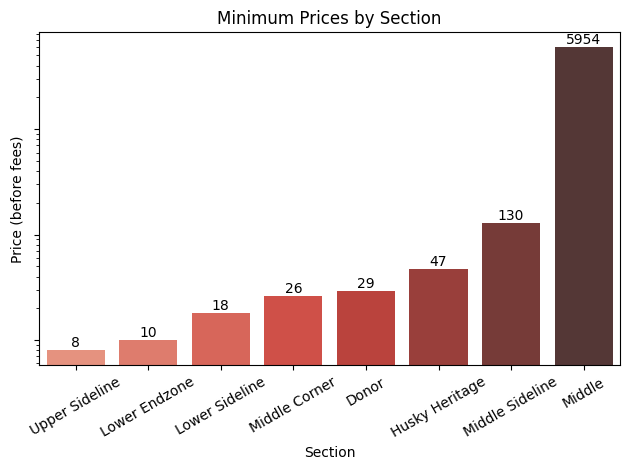

In [136]:
pal = sns.color_palette("Reds_d", len(ticket_median)) #create gradient palette

ax = sns.barplot(data=ticket_min,y="Price (before fees)", x = "Section",  palette = pal, hue = "Section") #create graph



ax.tick_params(axis='x', rotation=30) #adjust x axis
plt.yscale('log') #adjust scale of y axis
plt.gca().set_yticklabels([]) #remove y axis labels
for p in ax.patches:
    ax.annotate(f'\n{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black', size=10) #create data labels for each bar
plt.title("Minimum Prices by Section") #graph title
plt.tight_layout()
plt.show() #display graph